## Support Vector Machine
***

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn import datasets
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import model_selection as ms

In [150]:
cancer_data = datasets.load_breast_cancer()
y = cancer_data.target
X = cancer_data.data
X = preprocessing.scale(X)
X = X[:, :2]
y = np.where(y<=0, -1, 1)

In [151]:
def svm(lam: float, eta: float, epochs: int):
    """Support vector machine"""

    theta = np.zeros(X.shape[1])
    theta_0 = 0

    theta_lst = []
    theta_0_lst = []

    for e in range(epochs):
        for i in range(len(X)):
            
            check = y[i]*(np.dot(theta, X[i]) + theta_0) < 1 

            if check:
                theta   -= eta * (lam*theta - y[i]*X[i])
                theta_0 -= eta * -y[i]
            else:
                theta   -= eta * (lam*theta)
            
            theta_lst.append(list(theta))
            theta_0_lst.append(theta_0)

    return [
        np.array(theta_lst), 
        np.array(theta_0_lst)
    ]

In [144]:
theta, theta_0 = svm(lam=0.02, eta=0.0001, epochs=100)

final_theta = theta[-1]
final_theta_0 = theta_0[-1]

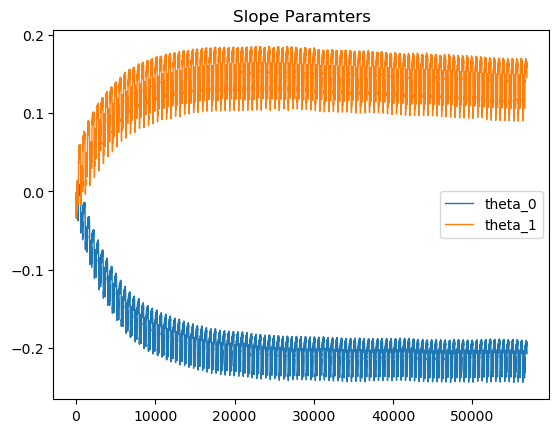

In [145]:
labels = ["theta_"+str(i) for i in range(theta.shape[1])]
lines = plt.plot(theta, lw=1)
plt.legend(lines, labels)
plt.title("Slope Paramters")
plt.show()

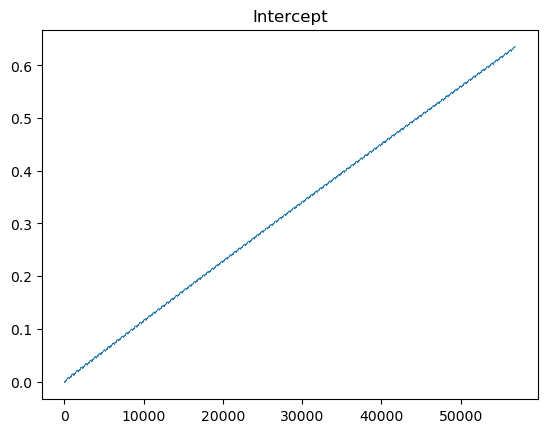

In [146]:
plt.plot(theta_0, lw=0.5)
plt.title("Intercept")
plt.show()

In [147]:
x1 = np.arange(int(X.min()), int(X.max()), 1)
y1 = -(final_theta[0]/final_theta[1]) * x1 - (final_theta_0/final_theta[1])

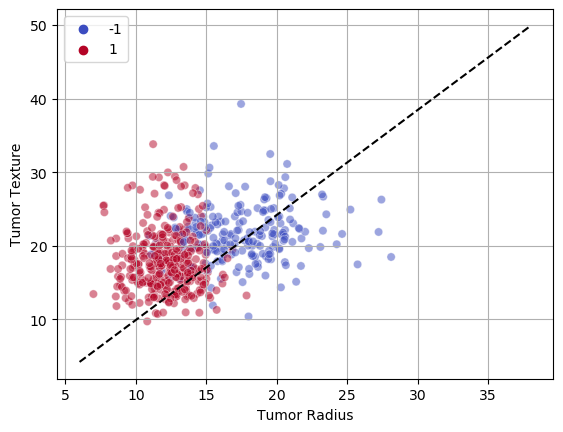

In [149]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, alpha=0.5, palette="coolwarm")
plt.xlabel('Tumor Radius')
plt.ylabel('Tumor Texture')
plt.plot(x1, y1, "--k")
plt.grid(True)

# plt.xlim(-6,6)
# plt.ylim(-6,6)

plt.show()

In [138]:
alpha = np.arange(1e-15, 1, 0.005)
val_scores = np.zeros((len(alpha), 1))

for i in range(len(alpha)):

    model = linear_model.SGDClassifier(loss='hinge', penalty='l2', alpha=alpha[i])
    score = ms.cross_val_score(model, X, y, cv=5)
    val_scores[i] = score.mean()

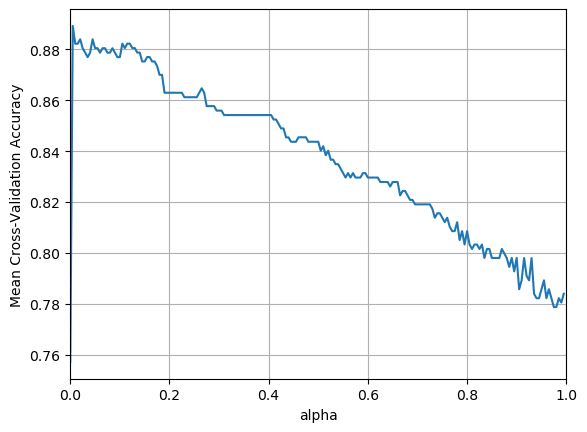

In [139]:
plt.plot(alpha, val_scores)
plt.xlim(0,1)
plt.xlabel('alpha')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.grid(True)
plt.show()

alpha_star = 0.005000000000001


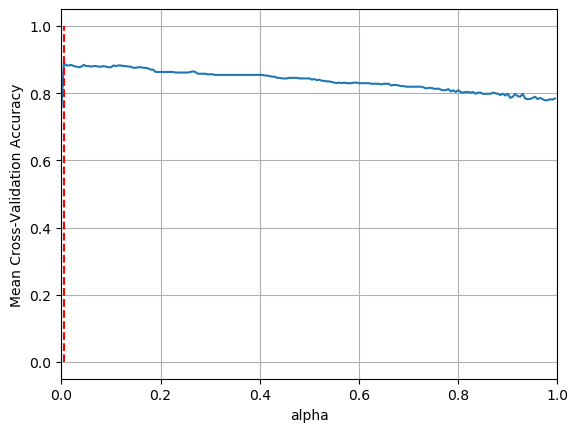

In [140]:


# Determine the alpha that maximizes the cross-validation score
ind = np.argmax(val_scores)
alpha_star = alpha[ind]
print('alpha_star =', alpha_star)

plt.plot(alpha,val_scores)
plt.plot(np.ones(11)*alpha_star,np.arange(0,1.1,0.1),'--r')
plt.xlim(0,1)
# plt.ylim(0.94,0.98)
plt.xlabel('alpha')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.grid(True)
plt.show()

Training Accuracy = 0.8804920913884007


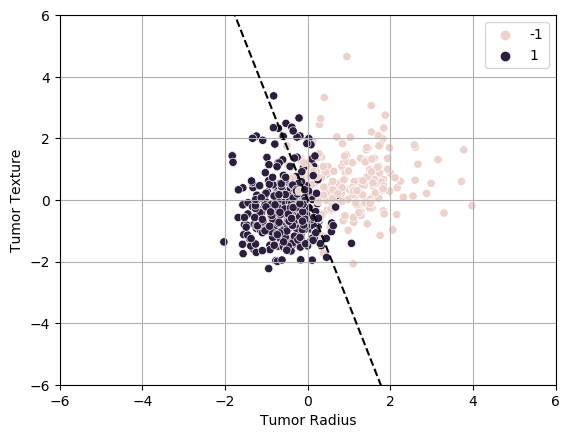

In [141]:

# Train model with alpha_star
model_star = linear_model.SGDClassifier(loss='hinge', penalty='l2', alpha=alpha_star, learning_rate="constant", eta0=0.001)
model_trained = model_star.fit(X,y)
print('Training Accuracy =', model_trained.score(X,y))
# Training Accuracy = 0.9806678383128296

# Plot decision boundary of trained model
slope = model_trained.coef_[0,0]/-model_trained.coef_[0,1]
x1 = np.arange(-10,10,0.5)
y1 = slope*x1
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
plt.plot(x1,y1,'--k')
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.xlabel('Tumor Radius')
plt.ylabel('Tumor Texture')
plt.grid(True)
plt.show()

In [29]:
slope = model_trained.coef_[0,1]/-model_trained.coef_[0,0]
x1 = np.arange(-10,10,0.5)
y1 = slope*x1


In [30]:
model_trained.coef_[0][1]/model_trained.coef_[0][0]

0.3272685101278269

In [31]:
model_trained.coef_

array([[-1.04928548, -0.3433981 ]])

In [32]:
model_trained.intercept_

array([0.479])